Ok so we have two modules, one that creates the synthetic data, and another that extracts the population correlation.

Here we put these together.

In [7]:
#import the modules
import cobra_analysis as ca  #this loads the function
import synthetic_signals as ss #this loads the data
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#get the signals
#inputs: n_cells, coupling_factors=np.linspace(0, 2, 10), duration=2000, dt=1.0):
activity_matrices, coupling_factors=ss.get_set_of_coupled_activity_matrices(100)
print coupling_factors

num_cells=np.shape(activity_matrices)[0]
num_factors=len(coupling_factors)
print 'shape of activity matrices is: ' + str(np.shape(activity_matrices))
print(num_cells)
print(num_factors)

[ 0.          0.22222222  0.44444444  0.66666667  0.88888889  1.11111111
  1.33333333  1.55555556  1.77777778  2.        ]
shape of activity matrices is: (2000, 100, 10)
2000
10


In [9]:
#get the pop_corr
mean_network_pop_corr=np.zeros_like(coupling_factors)
std_network_pop_corr=np.zeros_like(coupling_factors)


for i in np.arange(num_factors):
    temp =  ca.pop_corr(activity_matrices[:,:,i])
    mean_network_pop_corr[i]=np.mean(temp)
    std_network_pop_corr[i]=np.std(temp,ddof=1)

(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)


Now plot

/Users/madsarv/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


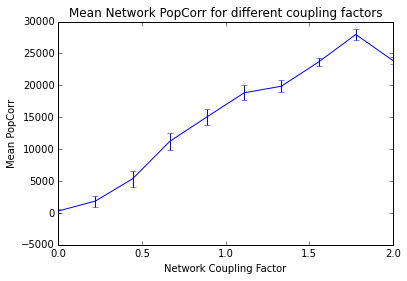

In [10]:
fig,ax = plt.subplots(1)
ax.errorbar(coupling_factors,mean_network_pop_corr,yerr=std_network_pop_corr)
ax.set_title('Mean Network PopCorr for different coupling factors')
ax.set_xlabel('Network Coupling Factor')
ax.set_ylabel('Mean PopCorr')